<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week1To8Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Upload Kaggle Token
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [2]:
# -----------------------------------------------------------------------
# Part 1: Week 1 - Setup & Data Download
# -----------------------------------------------------------------------
print("--- Part 1: Week 1 - Setting up Kaggle and Downloading Dataset ---")

# 1. Install Libraries
!pip install kaggle scikit-learn matplotlib seaborn -q

# 2. Set up Kaggle API Token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token installed.")

# 3. Download Dataset
!kaggle datasets download -d aljarah/xAPI-Edu-Data -q

# 4. Unzip Dataset
!unzip -oq xAPI-Edu-Data.zip
print("Dataset downloaded and unzipped.")
print("--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---")

--- Part 1: Week 1 - Setting up Kaggle and Downloading Dataset ---
Kaggle API token installed.
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
Dataset downloaded and unzipped.
--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---


In [3]:
# -----------------------------------------------------------------------
# Part 2: Week 2 - Data Cleaning & Preprocessing
# -----------------------------------------------------------------------
print("\n--- Part 2: Week 2 - Data Cleaning & Preprocessing ---")

# 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    accuracy_score, confusion_matrix, classification_report,
    RocCurveDisplay, roc_auc_score
)
print("✅ All necessary libraries imported.")

# 2. Load Data
df = pd.read_csv('xAPI-Edu-Data.csv')
df_cleaned = df.copy()
print(f"Initial data loaded with shape: {df_cleaned.shape}")

# 3. Standardize Column Names
df_cleaned.rename(columns={
    'gender': 'gender', 'NationalITy': 'nationality', 'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id', 'GradeID': 'grade_id', 'SectionID': 'section_id',
    'Topic': 'topic', 'Semester': 'semester', 'Relation': 'relation',
    'raisedhands': 'raised_hands', 'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view', 'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days', 'Class': 'class_label'
}, inplace=True)
print("Column names standardized.")

# 4. Handle Missing Values (None found)
if df_cleaned.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    print("Missing values found - requires handling.")

# 5. Remove Duplicates
dups_found = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Removed {dups_found} duplicate rows. New shape: {df_cleaned.shape}")

# 6. Encode Binary Categorical Features
df_cleaned['student_absence_days'] = df_cleaned['student_absence_days'].map({'Under-7': 0, 'Above-7': 1})
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})
df_cleaned['gender'] = df_cleaned['gender'].map({'M': 1, 'F': 0})
print("Binary features encoded (absences, parent survey/satisfaction, gender).")

# 7. Treat Outliers (Demo on 'raised_hands')
Q1 = df_cleaned['raised_hands'].quantile(0.25)
Q3 = df_cleaned['raised_hands'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned['raised_hands'] = df_cleaned['raised_hands'].clip(lower=lower_bound, upper=upper_bound)
print("Outliers clipped for 'raised_hands' (demo).")
print("--- Data Cleaning Complete ---")


--- Part 2: Week 2 - Data Cleaning & Preprocessing ---
✅ All necessary libraries imported.
Initial data loaded with shape: (480, 17)
Column names standardized.
No missing values found.
Removed 2 duplicate rows. New shape: (478, 17)
Binary features encoded (absences, parent survey/satisfaction, gender).
Outliers clipped for 'raised_hands' (demo).
--- Data Cleaning Complete ---



--- Part 3: Week 3 - Exploratory Data Analysis (Selected Plots) ---


/tmp/ipython-input-146483486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='class_label', order=class_order, palette='viridis')


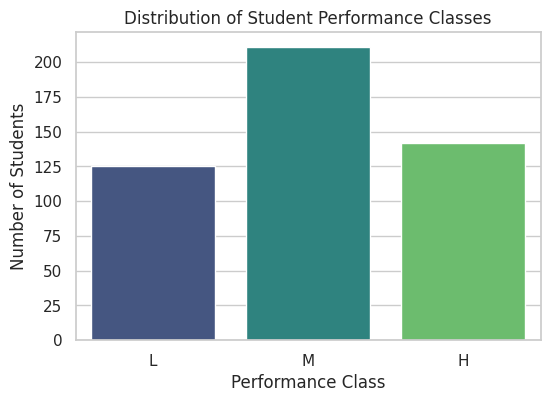

Plot 1: Target variable distribution visualized.


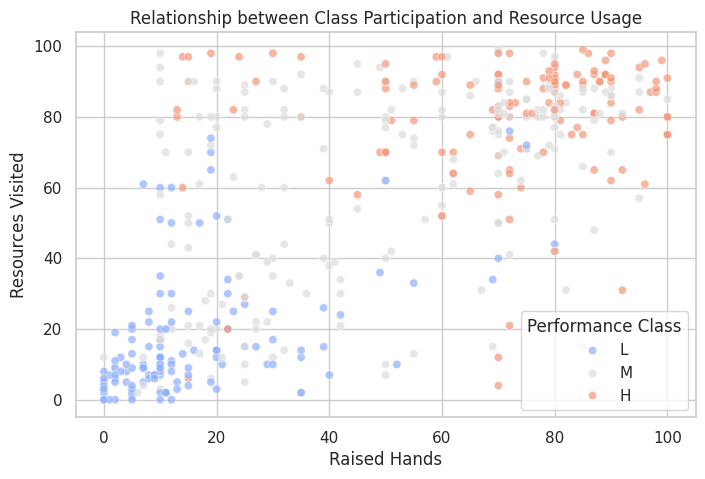

Plot 2: Relationship between key features visualized.
--- EDA Complete ---


In [4]:
# -----------------------------------------------------------------------
# Part 3: Week 3 - Exploratory Data Analysis (EDA)
# -----------------------------------------------------------------------
print("\n--- Part 3: Week 3 - Exploratory Data Analysis (Selected Plots) ---")
# (Generating only 2 key plots for brevity in the combined script)

sns.set_theme(style="whitegrid")
class_order = ['L', 'M', 'H']

# Plot 1: Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='class_label', order=class_order, palette='viridis')
plt.title('Distribution of Student Performance Classes')
plt.xlabel('Performance Class'); plt.ylabel('Number of Students')
plt.show()
print("Plot 1: Target variable distribution visualized.")

# Plot 2: Scatter Plot of Key Features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='raised_hands', y='visited_resources', hue='class_label',
                hue_order=class_order, palette='coolwarm', alpha=0.7)
plt.title('Relationship between Class Participation and Resource Usage')
plt.xlabel('Raised Hands'); plt.ylabel('Resources Visited')
plt.legend(title='Performance Class')
plt.show()
print("Plot 2: Relationship between key features visualized.")
print("--- EDA Complete ---")


--- Part 4: Week 4 - Statistical Analysis ---

Descriptive Statistics for 'visited_resources':
  Mean:     54.97
  Median:   65.00
  Mode:     80.00
  Variance: 1091.32

Top 3 Features Correlated with Performance:
visited_resources       0.674714
student_absence_days    0.668995
raised_hands            0.645007
Name: class_label_encoded, dtype: float64


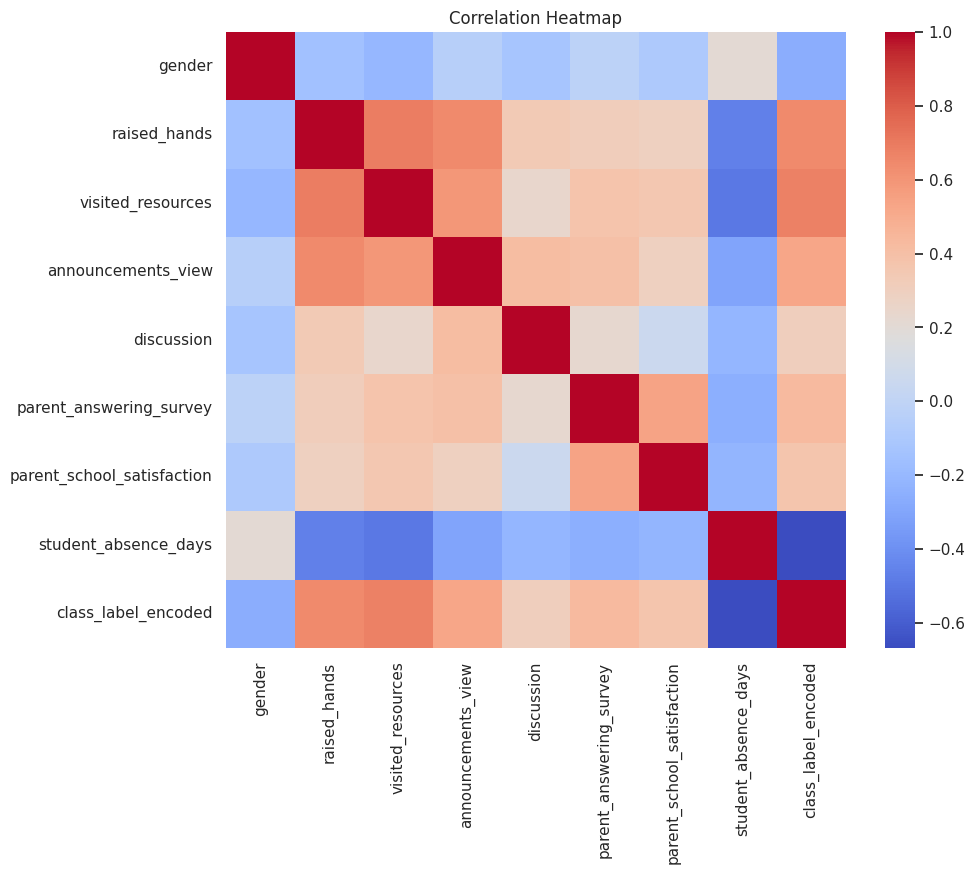

Correlation analysis complete and heatmap generated.
--- Statistical Analysis Complete ---


In [5]:
# -----------------------------------------------------------------------
# Part 4: Week 4 - Statistical Analysis & Feature Identification
# -----------------------------------------------------------------------
print("\n--- Part 4: Week 4 - Statistical Analysis ---")

# 1. Descriptive Statistics (Class Task Demo)
feature = 'visited_resources'
print(f"\nDescriptive Statistics for '{feature}':")
print(f"  Mean:     {df_cleaned[feature].mean():.2f}")
print(f"  Median:   {df_cleaned[feature].median():.2f}")
print(f"  Mode:     {df_cleaned[feature].mode()[0]:.2f}")
print(f"  Variance: {df_cleaned[feature].var():.2f}")

# 2. Correlation Analysis (Assignment 4)
# Encode target for correlation
target_map = {'L': 0, 'M': 1, 'H': 2}
df_cleaned['class_label_encoded'] = df_cleaned['class_label'].map(target_map)

# Calculate correlation
numerical_features_corr = df_cleaned.select_dtypes(include=[np.number])
corr_matrix = numerical_features_corr.corr()
corr_target = corr_matrix['class_label_encoded'].abs().sort_values(ascending=False)
top_features = corr_target.drop('class_label_encoded').head(3)

print("\nTop 3 Features Correlated with Performance:")
print(top_features)

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm') # Annot=False for cleaner combined script
plt.title('Correlation Heatmap')
plt.show()
print("Correlation analysis complete and heatmap generated.")
print("--- Statistical Analysis Complete ---")

# Drop the temporary encoded label before proceeding
df_cleaned = df_cleaned.drop('class_label_encoded', axis=1)


--- Part 5: Week 5 - Baseline Regression Model ---
Linear Regression model trained.
  MAE: 20.09
  RMSE: 24.32


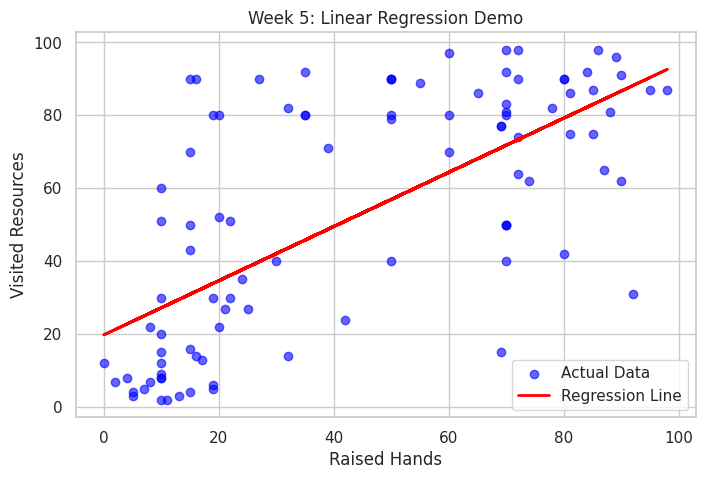

Baseline Regression complete.
--- Regression Task Complete ---


In [6]:
# -----------------------------------------------------------------------
# Part 5: Week 5 - Baseline Regression Model (Exercise)
# -----------------------------------------------------------------------
print("\n--- Part 5: Week 5 - Baseline Regression Model ---")

# 1. Define X and y for Regression Task
X_reg = df_cleaned[['raised_hands']]
y_reg = df_cleaned['visited_resources']

# 2. Split Data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 3. Train Linear Regression Model
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)
print("Linear Regression model trained.")

# 4. Evaluate
y_pred_reg = model_reg.predict(X_test_reg)
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"  MAE: {mae_reg:.2f}")
print(f"  RMSE: {rmse_reg:.2f}")

# Regression Line Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test_reg, y_test_reg, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_test_reg, y_pred_reg, color='red', linewidth=2, label='Regression Line')
plt.title('Week 5: Linear Regression Demo')
plt.xlabel('Raised Hands'); plt.ylabel('Visited Resources')
plt.legend()
plt.show()
print("Baseline Regression complete.")
print("--- Regression Task Complete ---")

In [7]:
# -----------------------------------------------------------------------
# Part 6: Week 6 - Baseline Classification Models
# -----------------------------------------------------------------------
print("\n--- Part 6: Week 6 - Baseline Classification Models ---")

# 1. Feature Engineering: One-Hot Encode remaining categoricals
categorical_features_cls = df_cleaned.select_dtypes(include=['object']).drop('class_label', axis=1).columns
df_processed_cls = pd.get_dummies(df_cleaned, columns=categorical_features_cls, drop_first=True)
print(f"One-Hot Encoding complete. Data shape: {df_processed_cls.shape}")

# 2. Define X and y for Classification
X_cls = df_processed_cls.drop('class_label', axis=1)
y_cls = df_processed_cls['class_label']

# 3. Split Data (Stratified)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)
print(f"Classification data split: {len(X_train_cls)} train, {len(X_test_cls)} test samples.")

# 4. Train and Compare Models
models_cls = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
results_cls = {}
print("Training classification models...")
for name, model in models_cls.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred_cls = model.predict(X_test_cls)
    accuracy = accuracy_score(y_test_cls, y_pred_cls)
    results_cls[name] = accuracy
    print(f"  {name}: {accuracy*100:.2f}% Accuracy")

best_model_name = max(results_cls, key=results_cls.get)
print(f"\nBest Baseline Model (Week 6): {best_model_name}")
print("--- Baseline Classification Complete ---")


--- Part 6: Week 6 - Baseline Classification Models ---
One-Hot Encoding complete. Data shape: (478, 61)
Classification data split: 382 train, 96 test samples.
Training classification models...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Logistic Regression: 73.96% Accuracy
  Decision Tree: 68.75% Accuracy
  Random Forest: 80.21% Accuracy

Best Baseline Model (Week 6): Random Forest
--- Baseline Classification Complete ---



--- Part 7: Week 7 - In-Depth Evaluation ---

Confusion Matrix:


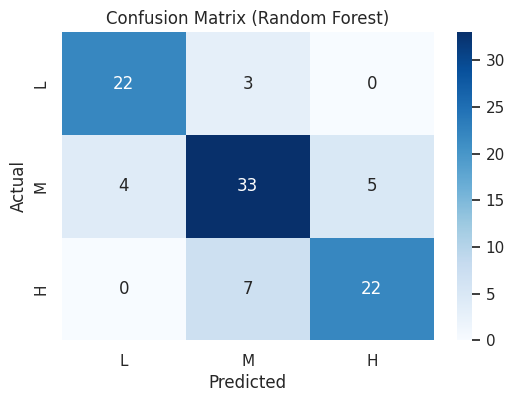


Classification Report:
              precision    recall  f1-score   support

           L       0.85      0.88      0.86        25
           M       0.77      0.79      0.78        42
           H       0.81      0.76      0.79        29

    accuracy                           0.80        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.80      0.80      0.80        96


ROC Curve (One-vs-Rest):


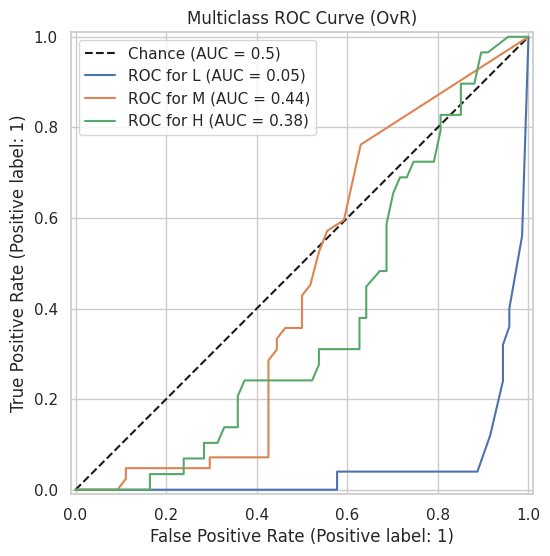

In-depth evaluation complete.
--- Model Evaluation Complete ---


In [8]:
# -----------------------------------------------------------------------
# Part 7: Week 7 - In-Depth Evaluation (Best Model: Random Forest)
# -----------------------------------------------------------------------
print("\n--- Part 7: Week 7 - In-Depth Evaluation ---")

# 1. Retrain the best model (Random Forest) if needed, or use existing one
best_model = models_cls[best_model_name]
# Make predictions (labels and probabilities)
y_pred_best = best_model.predict(X_test_cls)
y_pred_proba_best = best_model.predict_proba(X_test_cls)

# 2. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_cls, y_pred_best, labels=class_order)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_order, yticklabels=class_order)
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_best, labels=class_order))

# 4. ROC Curve (Multiclass - One-vs-Rest)
print("\nROC Curve (One-vs-Rest):")
y_test_binarized = label_binarize(y_test_cls, classes=class_order)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')
for i, class_name in enumerate(class_order):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i], y_pred_proba_best[:, i],
        name=f"ROC for {class_name}", ax=ax
    )
plt.title('Multiclass ROC Curve (OvR)')
plt.legend()
plt.show()
print("In-depth evaluation complete.")
print("--- Model Evaluation Complete ---")


--- Part 8: Week 8 - Unsupervised Learning ---
Scaling data for unsupervised learning...
Applying PCA...
Applying K-Means (k=3)...

Visualizing PCA results colored by K-Means clusters:


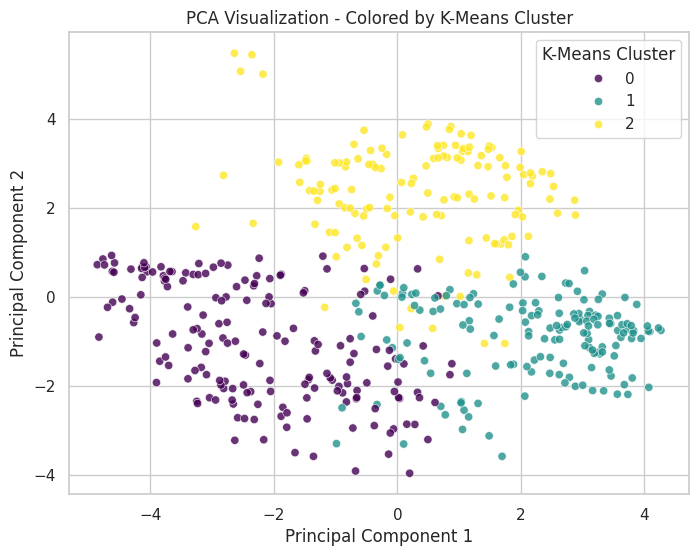


Visualizing PCA results colored by True Labels:


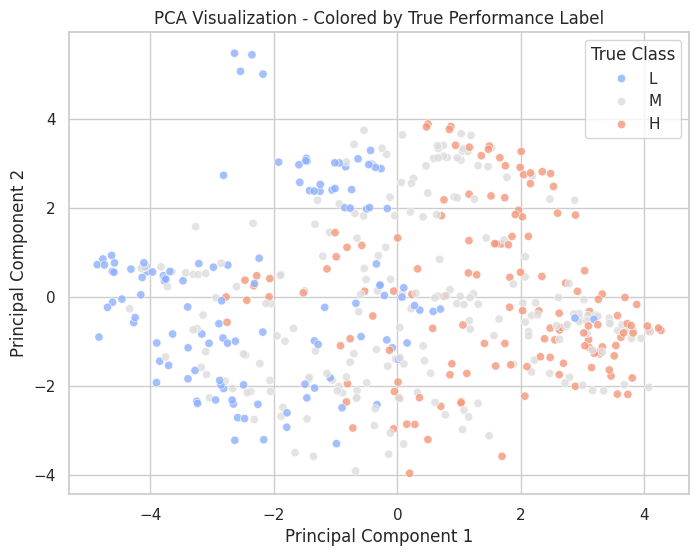

Unsupervised analysis complete.
--- Unsupervised Learning Complete ---

ALL CODE FROM WEEKS 1-8 EXECUTED!


In [9]:
# Part 8: Week 8 - Unsupervised Learning (PCA & K-Means)
# -----------------------------------------------------------------------
print("\n--- Part 8: Week 8 - Unsupervised Learning ---")

# 1. Scale Data (using the classification features X_cls)
print("Scaling data for unsupervised learning...")
scaler = StandardScaler()
X_scaled_unsup = scaler.fit_transform(X_cls)

# 2. Apply PCA
print("Applying PCA...")
pca = PCA(n_components=2)
X_pca_unsup = pca.fit_transform(X_scaled_unsup)

# 3. Apply K-Means
print("Applying K-Means (k=3)...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled_unsup)
cluster_labels_unsup = kmeans.labels_

# 4. Prepare DataFrame for Plotting
df_plot_unsup = pd.DataFrame(X_pca_unsup, columns=['PC1', 'PC2'])
df_plot_unsup['kmeans_cluster'] = cluster_labels_unsup
df_plot_unsup['true_label'] = y_cls.values # Add true labels using original index

# 5. Visualize PCA colored by K-Means Clusters
print("\nVisualizing PCA results colored by K-Means clusters:")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot_unsup, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', alpha=0.8)
plt.title('PCA Visualization - Colored by K-Means Cluster')
plt.xlabel('Principal Component 1'); plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

# 6. Visualize PCA colored by True Labels
print("\nVisualizing PCA results colored by True Labels:")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot_unsup, x='PC1', y='PC2', hue='true_label', hue_order=class_order, palette='coolwarm', alpha=0.8)
plt.title('PCA Visualization - Colored by True Performance Label')
plt.xlabel('Principal Component 1'); plt.ylabel('Principal Component 2')
plt.legend(title='True Class')
plt.show()
print("Unsupervised analysis complete.")
print("--- Unsupervised Learning Complete ---")

print("\nALL CODE FROM WEEKS 1-8 EXECUTED!")